# Bias-variance trade-off and learning curves

Remember from the theory presented during the lecture that our goal is to locate the optimum model, $h_{\theta}(x)$, that better approximates the always elusive and unknow target function, $f(x)$. Models can be distinguished by their degree of complexity/flexibility (i.e. the number of degrees of freedom/parameters that they can afford). In order to pin down the right model complexity/flexibility, we need to take into account the pervasive trade-off between model's bias and model's variance since the total error of our model will be equal to bias+variance. 

<img src="images/18_bias_variance.png">

## Overfitting, Underfitting and Model Selection

Selecting the optimal model complexity for your data is vital. Of core importance are the following question:

**If our estimator/model is underperforming, how should we move forward?**

- Use simpler or more complicated model?
- Add more features (Columns in $X$)?
- Add more training data point (samples)?

The answer is often counter-intuitive.  In particular, **sometimes using a more complicated model will give _worse_ results.**  This will occur when you don't have enough training data for the chosen model complexity. In this situation, your model will suffer from high variance. Alternatively, **sometimes adding training data will not improve your results.**  This will occur when you are using a model which is too simple and regardless of the amount of training data you feed it with, it will suffer from high bias. 

### Overfitting in a nutshell

What exactly is an overfitted model? A model that does well on the training data, but doesn't generalize to unseen (test) data. This occurs because the model learned the signal *plus the noise* in the training data (the model matches the training set too closely).

The figure below represents a classification scenario with training data represented as dots belonging to 2 different classes (red and blue), the green line represents a complex model that has probably overfitted the training data. The black line on the other hand, represents a model that is probably just right for this sort of data:
<img src="images/18_overfitting.png">

A further example of the variance/bias trade-off in a regression scenario can be found below:

- underfitting/high bias (left), the model doesn't have enough degrees of freedom/flexibility (i.e. parameters) to capture the curvilinear trend in the data

- just right (center), the model has the right amount of complexity to capture the curvilinear trend in the data  

- overfitting/high variance (right): the model has too many parameters and it learns the noise in the data

<img src="images/18_underfitting_overfitting.png">

## Illustration of the Bias-Variance Tradeoff

For this section, we'll work with a simple 1D linear regression problem.  This will help us to easily visualize the data and the model, and the results generalize easily to  higher-dimensional datasets.  

We'll create a simple nonlinear target function $f$ (which in normal circumstances is unknown to us). $f$ is the underlying true model that generates the data and which we will try to estimate with our model $h_{\theta}(x)$.

In [1]:
# this is our target function f, don't worry too much about the specific code
def target_function(x, err=0.5):    
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

Let's plot how the "_unknown target function_" looks like:

(-0.2, 1.2)

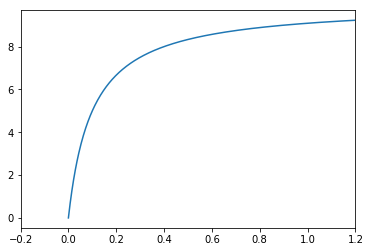

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1.2, 500)
y = target_function(x, err=0)
plt.plot(x,y)
plt.xlim([-0.2,1.2])

Obviously, it is a nonlinear function. Next, let's generate a few random points sampled from the target function (with a bit of added noise) to generate our training dataset:

In [3]:
def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(random_seed)
    X = np.random.random(N)[:, np.newaxis]
    y = target_function(X.ravel(), error)
    
    return X, y

Let's plot the random points sampled from the target function. They will be our training data:

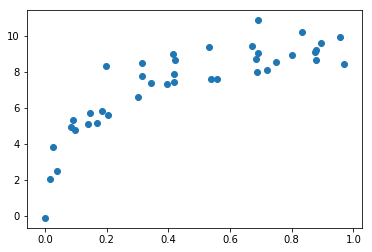

In [4]:
%matplotlib inline 
#Remember, you do need to include the previous line if you're working in the Spyder interpreter
import numpy as np
import matplotlib.pyplot as plt
X_train, y_train = make_data(40, error=1)
plt.scatter(X_train.ravel(), y_train);
plt.show()

Let's create now some test data by again sampling from the target function. We will use this test data set to evaluate the performance of several models $h_{\theta}$ on out of sample data.

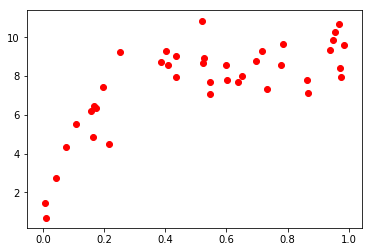

In [5]:
X_test, y_test = make_data(40, error=1, random_seed=4)
plt.scatter(X_test, y_test,c='r');
plt.show()

Now say we want to perform a regression on our training data (blue points).  Let's use the built-in linear regression function to compute a model $h_{\theta}(x)=\theta_0+\theta_1x$ and plot it:

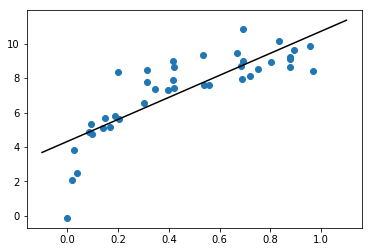

the estimated model coefficients are 4.3196800051878945 [6.40260219]
mean squared error on training data: 1.7851464506138046
mean squared error on test data: 2.6254329288366973
R square on training data: 0.6777719827689122
R square on test data: 0.5020509052005169


In [6]:
trainingErrors = []
testErrors = []
modelDegrees = []

from sklearn import metrics
X_plot = np.linspace(-0.1, 1.1, 500)[:, None]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_plot = model.predict(X_plot)

plt.scatter(X_train, y_train)
plt.plot(X_plot, y_plot,c='k')
plt.show()
print("the estimated model coefficients are", model.intercept_, model.coef_)
trainError = metrics.mean_squared_error(model.predict(X_train), y_train)
trainingErrors.append(trainError)
print("mean squared error on training data:", trainError)
testError = metrics.mean_squared_error(model.predict(X_test), y_test)
testErrors.append(testError)
print("mean squared error on test data:", testError)
print("R square on training data:", model.score(X_train,y_train))
print("R square on test data:", model.score(X_test,y_test))
modelDegrees.append(1)

Observe that your estimated model contains 2 coefficients: $\theta_0$ and $\theta_1$

Recall that the mean squared error is the average vertical distance from each trainin points to the line/model $h(x)$.
We have fitted a straight line to the data. That straight line is our best fit to the data, the better estimation $h(x)$ that the linear regression model achieves when trying to approximate $f(x)$. But clearly this model is not optimal.  We say that this model is **biased**, or that it **under-fits** the data. It basically assumes that there is a linear relationship between $x$ and $y$. In reality, that relationship is curvilinear as is apparent to the naked eye by observing the training data in the scatter plot. However the linear regression model does not have enough degrees of freedom to accommodate a nonlinear relationship, it can only generate linear hypothesis $h(x)$, i.e. a line ($h=\theta_0+\theta_1x$) composed of a slope ($\theta_1$) and an intercept ($\theta_0$).

Let's try to improve our estimation of $f(x)$ by creating a more complicated model $h(x)$.  We can do this by adding degrees of freedom, and computing a polynomial regression over the inputs.  Let's make this easier by creating a quick `PolynomialRegression` estimator. Remember that the matrix $X$ in our previous example contains only one feature/column $x_1$. The class `PolynomialRegression` simply adds additional features to $X$:  $x_1^2$, $x_1^3...$ using the input parameter `degree`.

In [7]:
class PolynomialRegression(LinearRegression):
    """Simple Polynomial Regression to 1D data"""
    def __init__(self, degree=1, **kwargs):
        self.degree = degree
        LinearRegression.__init__(self, **kwargs)
        
    def fit(self, X, y):
        if X.shape[1] != 1:
            raise ValueError("Only 1D data valid here")
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.fit(self, Xp, y)
        
    def predict(self, X):
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.predict(self, Xp)

Now we'll use the `PolynomialRegression` class to fit a quadratic curve (polynomial of degree 2) to the training data (blue dots).

the estimated model coefficients are 2.65333111393464 [ 18.25439015 -12.48429509]
mean squared error on training data: 0.9197171922424537
mean squared error on test data: 1.5720281288327083
R square on training data: 0.8339863672430186
R square on test data: 0.7018434654514604


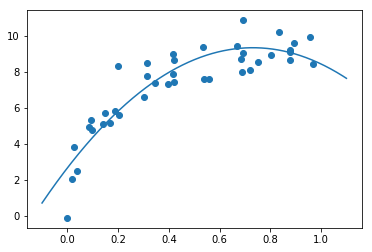

In [8]:
degree=2
model = PolynomialRegression(degree)
model.fit(X_train, y_train)
y_plot = model.predict(X_plot)

plt.scatter(X_train, y_train)
plt.plot(X_plot, y_plot)
#plt.plot(X_test, y_test_predictions)
print("the estimated model coefficients are", model.intercept_, model.coef_)
trainError = metrics.mean_squared_error(model.predict(X_train), y_train)
trainingErrors.append(trainError)
print("mean squared error on training data:", trainError)
testError = metrics.mean_squared_error(model.predict(X_test), y_test)
testErrors.append(testError)
print("mean squared error on test data:", testError)
print("R square on training data:", model.score(X_train,y_train))
print("R square on test data:", model.score(X_test,y_test))
modelDegrees.append(degree)

Observe that your estimated model contains 3 parameters/coefficients: $\theta_0$, $\theta_1$ and $\theta_2$

This quadratic model, $h(x)=\theta_0+\theta_1x+\theta_2x^2$, reduces the mean squared error of both the training and test sets. You can visually observe that it makes a much better fit (a better approximation to $f(x)$) and that we have reduced the mean squared error on the test data. The same trend is also obvious on the $R^2$ statistic ( the percentage of variance in the data explained by the model) which has improved with respect to our previous model with only 2 parameters.   

But what would happen if we increase the hypothesis set $H$ by adding more degrees of freedom? That is, what happens if we use an even higher-degree polynomial (order 15) with 15 features? We will use the class `PolynomialRegression` to create additional artificial features which are simply combinations of the original feature $x_1$. Those combined non-linear transform are $x_1^2, x_1^3, x_1^{4} ... $ all the way up to $x_1^{15}$. hence our feature matrix $X$ will contain 15 columns/predictors/features.

the estimated model coefficients are -0.21008035929110314 [ 3.76994055e+02 -1.92690239e+04  5.10559885e+05 -7.53154796e+06
  6.82623034e+07 -4.06603083e+08  1.66412974e+09 -4.81331865e+09
  9.98961039e+09 -1.49300228e+10  1.59275004e+10 -1.18281985e+10
  5.80762897e+09 -1.69424804e+09  2.22299194e+08]
mean squared error on training data: 0.4782753488406513
mean squared error on test data: 2.7490321067762498
R square on training data: 0.9136688660504916
R square on test data: 0.47860863855680913


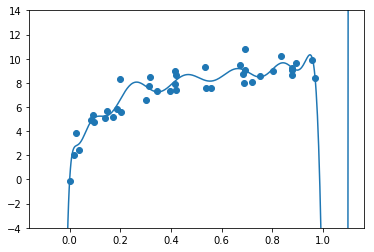

In [9]:
degree=15
model = PolynomialRegression(degree)
model.fit(X_train, y_train)
y_plot = model.predict(X_plot)

plt.scatter(X_train, y_train)
plt.plot(X_plot, y_plot)
plt.ylim(-4, 14)

print("the estimated model coefficients are", model.intercept_, model.coef_)
trainError = metrics.mean_squared_error(model.predict(X_train), y_train)
trainingErrors.append(trainError)
print("mean squared error on training data:", trainError)
testError = metrics.mean_squared_error(model.predict(X_test), y_test)
testErrors.append(testError)
print("mean squared error on test data:", testError)
print("R square on training data:", model.score(X_train,y_train))
print("R square on test data:", model.score(X_test,y_test))
modelDegrees.append(degree)

Observe that your estimated model now contains 15 coefficients: $\theta_0$, $\theta_1 ... \theta_{15}$.

Notice that we have markedly reduced the mean squared error on the training data (the difference between the training data and the model). When we increase the degrees of the model to this extent, it's clear that the resulting fit is no longer reflecting the true underlying distribution, but is more sensitive to the noise in the training data. As a result, the error on the test data has increased. For this reason, we call it a **high-variance model**, and we say that it **over-fits** the data. The same trend is also obvious on the $R^2$ statistic, which has improved for the training data but decreased for the more significant test data.

To visually understand what high variance (overfitting) means, let's create some additional artificial data from the same target function $f(x)$. We will compute another fit to the data using Polynomial Regression with 15° of freedom. We will plot both estimations of $f(x)$. $h_1(x)$ in blue (the model estimated for the original training data) and $h_2(x)$ in red (the model estimated for the new training data set $X_2$.

(-4, 14)

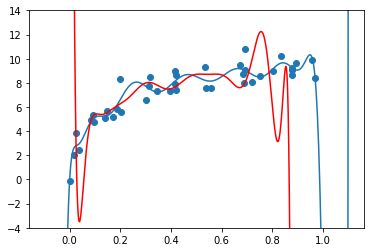

In [11]:
X2, y2 = make_data(40, error=1,random_seed=2)
model2 = PolynomialRegression(degree=15)
model2.fit(X2, y2)

X2_test = np.linspace(-0.1, 1.1, 500)[:, None]
y2_plot = model2.predict(X_plot)

plt.scatter(X_train, y_train)
plt.plot(X_plot, y_plot)
plt.plot(X_plot, y2_plot, color='red')
plt.ylim(-4, 14)

The considerable misalignment between the blue and the red models ($h_1(x)$ and $h_2(x)$) even though they both have the same amount of degrees of freedom/parameters (15) and were trained on data sampled from the same underlying target function is what we refer to as high variance. This variance refers to the discrepancies between the different model estimations $h_n(x)$ generated when using different training data sets.

## Detecting over-fitting

Clearly, computing the error on the training data can be misleading. We need to compute the error rate on the testing data (data which the model estimation algorithm has not seen) in order to properly estimate the generalization abilities of our model.  But computing the *training error* can help us determine what's going on: in particular, comparing the training error and the test error can give you an indication of how well your data is being fit, i.e. whether your model is underfitting, overfitting  or just right.

Let's do this. We are going to plot The training and test errors on the data in X as we increase the degrees (flexibility) of our polynomial model. 

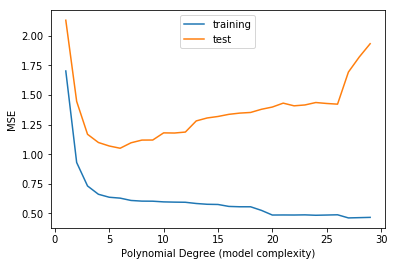

In [12]:
#Don't worry about the specifics of the code snippet, focus on the visualization
from sklearn.model_selection import train_test_split

degrees = np.arange(1, 30)

X, y = make_data(100, error=1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

training_error = []
test_error = []
mse = metrics.mean_squared_error

for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)
    training_error.append(mse(model.predict(X_train), y_train))
    test_error.append(mse(model.predict(X_test), y_test))
    
plt.plot(degrees, training_error, label='training')
plt.plot(degrees, test_error, label='test')
plt.legend()
plt.xlabel('Polynomial Degree (model complexity)')

plt.ylabel('MSE');

This is a typical bias/variance plot. Notice how as the model complexity increases, the training error decreases but the test error eventually starts to increase after an initial decrease. 

On the **Left Side** of the plot, we have **high-bias** models, characterized by the training and test data showing equally bad performance.  This shows that the model is **under-fitting** the data, because it does equally poorly on both known and unknown values. The model doesn't have enough parameters to capture the trend in the data.

On the **Right Side** of the plot, we have a **high-variance model**, characterized by a divergence of the training and test data.  Here the model is **over-fitting** the training data. In other words, the particular noise distribution of the input data has too much effect on the result.

The optimal model here will be around the point where the **test** error of the estimated $h(x)$ is minimized (a model with 2-5 degrees of freedom combined with the least amount of model complexity. Remember that the training error only captures the ability of the model to remember the training data. But the really important ability of a machine learning model is its ability to generalize. That is, to make good predictions on data it has never seen before (such as the test data).

But which Polynomial degree value should we choose? 2, 3, 4 or 5. When there is equal/similar error on the test set for different degrees of complexity, choose the simplest model, in this case 2° of freedom, $x_1$ and $x_1^2$. The laws governing the function of the universe tend to (or at least we perceive it that way) favor [parsimony/Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor):

>The parsimony principle is basic to all science and tells us to choose the simplest scientific explanation that fits the evidence.



## Illustration of Learning Curves

The exact turning-point of the tradeoff between bias and variance is highly dependent on the number of training points used. Having more training points (data) available allows us to reliably use more complex models. Here we'll illustrate the use of *learning curves*, which display this property.

The idea is to plot the mean-squared-error for the training and test set as a function of *Number of Training Points*. Don't worry about the code snippet below, but make sure you understand the subsequent figure.

In [15]:
#Don't worry about the specifics of the code snippet, focus on the visualization
from sklearn.model_selection import train_test_split
X, y = make_data(200, error=1.0)
degree = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

N_range = np.linspace(1, X_train.shape[0], 20).astype(int)

def plot_learning_curve(degree=3):
    training_error = []
    test_error = []
    mse = metrics.mean_squared_error
    
    for N in N_range:
        XN = X_train[:N]
        yN = y_train[:N]
    
        model = PolynomialRegression(degree).fit(XN, yN)
        training_error.append(mse(model.predict(XN), yN))
        test_error.append(mse(model.predict(X_test), y_test))
      
    plt.plot(N_range, training_error, label='training')
    plt.plot(N_range, test_error, label='test')
    plt.plot(N_range, np.ones_like(N_range), ':k')
    plt.ylim([0,5])
    plt.legend()
    plt.title('polynomial of degree = {0}'.format(degree))
    plt.xlabel('num. training points')
    plt.ylabel('MSE')

now let's plot a learning curve for a polynomial of degree 2 model (i.e. 3 parameters, $h(x)=\theta_0+\theta_1x+\theta_2x^2$)

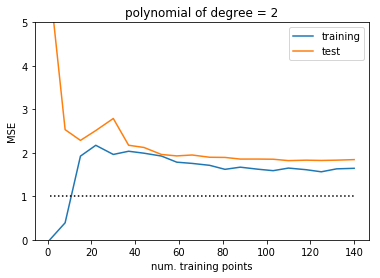

In [18]:
plot_learning_curve(2)

This shows a typical learning curve for a high bias situation (underfitting). Notice how the training and test errors converge very fast (for very small number of training points). Given the same model, for a large enough number of training points, the training and testing errors converge, which indicates potential under-fitting. This is confirmed by noticing how both curves are relatively far away from the theoretical minimum mean squared error possible of 1. This minimum error is unavoidable since we generated the training data from the target function $f$ with an amount of noise equal to 1.

It is easy to see that, in this plot, if you'd like to reduce the MSE down to the nominal value of 1.0 (which is the magnitude of the unavoidable error (noise we included when constructing the data), then adding more samples will never get you there since you are stuck in a high biased situation. Your model simply is not flexible/complex (i.e. does not have enough degrees of freedom) to properly fit the data. 

let's now try to plot a learning curve for a more complex model, a polynomial of degree 6:

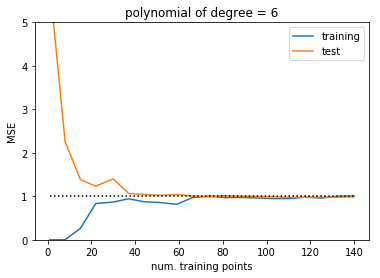

In [19]:
plot_learning_curve(6)

This shows a typical learning curve. For very few training points (the left side of the plot), there is a large separation between the training and test error, which indicates over-fitting for situations in which only a few training points are available. With enough training points available however (around 40 for this particular case) both training and test errors converge. Importantly, they do converge on the theoretical minimum MSE of 1, indicating that this model is just right for data sets with training set size between 30 and 140. 

Finally, let's use an overly complex model that clearly will overfit the data

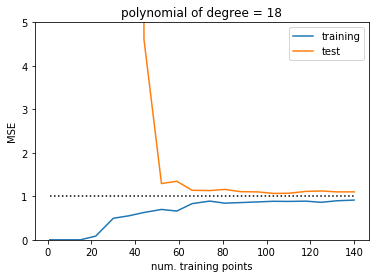

In [20]:
plot_learning_curve(18)

Observe that if you would only have 40 training points available, this model would have a terrible test set error, while the previous model with just 6° of freedom would get a very good test set error. Hence, the situation in this learning curve is clearly one of overfitting for when the number of training points is smaller than around 50. 

This curves can be very useful, because they give you a hint about how to improve upon results which are sub-par.  To make this more concrete, imagine a project in which the results are not robust enough.  You must think about whether to spend your valuable time generating more training points, more attributes of each data point/sample or use more complex/simple models in order to improve performance. The answer to this question is important, and can be addressed using learning curves.